# Pokemon Stats Dataset
- This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed. It has been of great use when teaching statistics to kids. With certain types you can also give a geeky introduction to machine learning.

- This are the raw attributes that are used for calculating how much damage an attack will do in the games. This dataset is about the pokemon games only.


In [ ]:
import pandas as pd

## Looking at Data :
- After importing the pandas library, we load and look at the data by trying different functions.

In [ ]:
df = pd.read_csv("Pokemon.csv",index_col = "Name")
# Looking at data
print(df)
print(df.columns)

                         #   Type 1  Type 2  Total  HP  Attack  Defense  \
Name                                                                      
Bulbasaur                1    Grass  Poison    318  45      49       49   
Ivysaur                  2    Grass  Poison    405  60      62       63   
Venusaur                 3    Grass  Poison    525  80      82       83   
VenusaurMega Venusaur    3    Grass  Poison    625  80     100      123   
Charmander               4     Fire     NaN    309  39      52       43   
...                    ...      ...     ...    ...  ..     ...      ...   
Diancie                719     Rock   Fairy    600  50     100      150   
DiancieMega Diancie    719     Rock   Fairy    700  50     160      110   
HoopaHoopa Confined    720  Psychic   Ghost    600  80     110       60   
HoopaHoopa Unbound     720  Psychic    Dark    680  80     160       60   
Volcanion              721     Fire   Water    600  80     110      120   

                       S

In [ ]:

print(df.loc["Lucario"])
print(df.loc["Lucario"],["Type 1","Type 2"])

#                  448
Type 1        Fighting
Type 2           Steel
Total              525
HP                  70
Attack             110
Defense             70
Sp. Atk            115
Sp. Def             70
Speed               90
Generation           4
Legendary        False
Name: Lucario, dtype: object
#                  448
Type 1        Fighting
Type 2           Steel
Total              525
HP                  70
Attack             110
Defense             70
Sp. Atk            115
Sp. Def             70
Speed               90
Generation           4
Legendary        False
Name: Lucario, dtype: object ['Type 1', 'Type 2']


In [ ]:
print("\nNumber of rows and columns : ")
print(df.shape)
print("\nData description : ")
print(df.describe())
print("\nData info : ")
print(df.info())
print("\n Null Values :")
print(df.isnull().sum())


Number of rows and columns : 
(800, 12)

Data description : 
                #      Total          HP      Attack     Defense     Sp. Atk  \
count  800.000000  800.00000  800.000000  800.000000  800.000000  800.000000   
mean   362.813750  435.10250   69.258750   79.001250   73.842500   72.820000   
std    208.343798  119.96304   25.534669   32.457366   31.183501   32.722294   
min      1.000000  180.00000    1.000000    5.000000    5.000000   10.000000   
25%    184.750000  330.00000   50.000000   55.000000   50.000000   49.750000   
50%    364.500000  450.00000   65.000000   75.000000   70.000000   65.000000   
75%    539.250000  515.00000   80.000000  100.000000   90.000000   95.000000   
max    721.000000  780.00000  255.000000  190.000000  230.000000  194.000000   

          Sp. Def       Speed  Generation  
count  800.000000  800.000000   800.00000  
mean    71.902500   68.277500     3.32375  
std     27.828916   29.060474     1.66129  
min     20.000000    5.000000     1.00000

## Data Cleaning :
- After looking at the data , we clean the data to perform EDA afterwards.

In [ ]:
df["Type 2"]=df["Type 2"].fillna("None") # Replacing Type 2 : NaN's with None.
print(df.head())

                       # Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  \
Name                                                                           
Bulbasaur              1  Grass  Poison    318  45      49       49       65   
Ivysaur                2  Grass  Poison    405  60      62       63       80   
Venusaur               3  Grass  Poison    525  80      82       83      100   
VenusaurMega Venusaur  3  Grass  Poison    625  80     100      123      122   
Charmander             4   Fire    None    309  39      52       43       60   

                       Sp. Def  Speed  Generation  Legendary  
Name                                                          
Bulbasaur                   65     45           1      False  
Ivysaur                     80     60           1      False  
Venusaur                   100     80           1      False  
VenusaurMega Venusaur      120     80           1      False  
Charmander                  50     65           1      False 

## Performing EDA
- Importing libraries to perform EDA.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

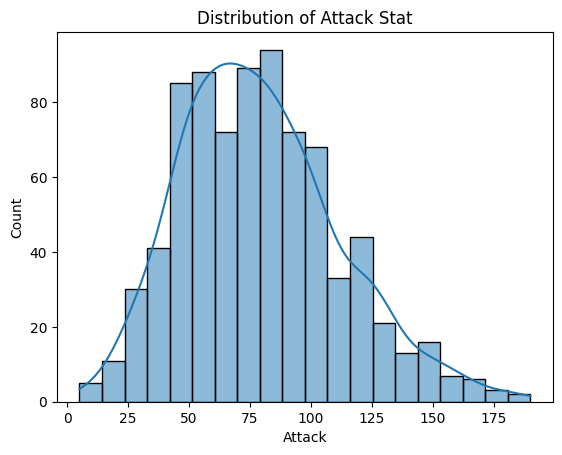

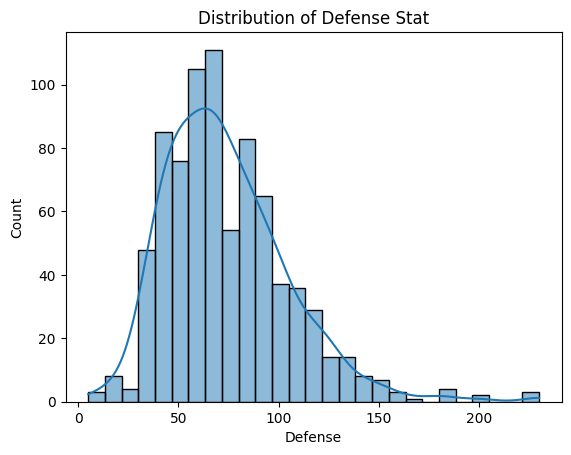

In [ ]:
sns.histplot(df["Attack"],kde = True)
plt.title("Distribution of Attack Stat")
plt.show()

sns.histplot(df["Defense"],kde = True)
plt.title("Distribution of Defense Stat")
plt.show()

Total stats VS Legendary stats


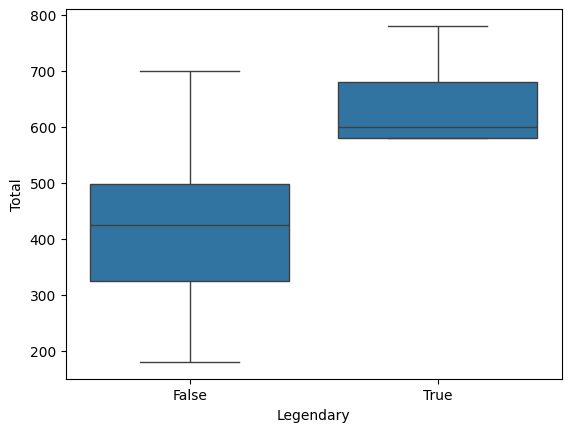

In [ ]:
sns.boxplot(x = "Legendary" , y = "Total" , data = df)
print("Total stats VS Legendary stats")
plt.show()

In [ ]:
print(df.columns)

Index(['#', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


<Axes: >

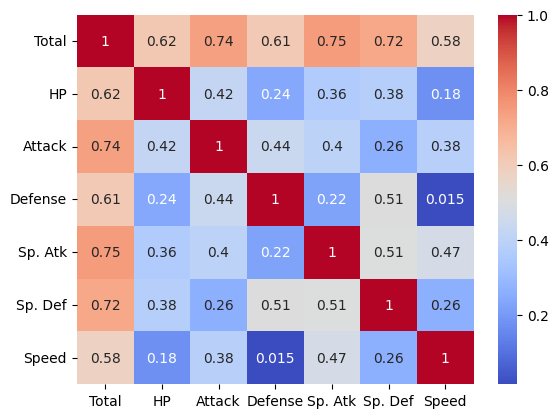

In [ ]:
sns.heatmap(df[["Total","HP","Attack","Defense","Sp. Atk","Sp. Def","Speed"]].corr(),annot=True,cmap="coolwarm")

## Predicting Total Stats

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report

In [ ]:
X = df[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]]
y = df["Total"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

dt = DecisionTreeRegressor(random_state = 42)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

rf = RandomForestRegressor(random_state = 42,n_estimators = 100)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

def evaluate(y_true,y_pred):
    return {
      "MAE" : mean_absolute_error(y_true,y_pred),"RMSE":np.sqrt(mean_squared_error(y_true,y_pred)),"R2":r2_score(y_true,y_pred)
    }

In [ ]:
results = {"Linear Regression " : evaluate(y_test,y_pred_lr),"Decision Tree" : evaluate(y_test,y_pred_dt),"Random Forest " : evaluate(y_test,y_pred_rf)}
print("\n----Regression Results---")
print(pd.DataFrame(results))


----Regression Results---
      Linear Regression   Decision Tree  Random Forest 
MAE         7.034373e-14      30.837500       16.507625
RMSE        9.891612e-14      43.715844       24.527769
R2          1.000000e+00       0.861042        0.956256


In [ ]:
X_cls = df[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]]
y_cls = df["Legendary"].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

dt_cls = DecisionTreeClassifier(random_state = 42)
dt_cls.fit(X_train,y_train)
y_pred_dt_cls = dt_cls.predict(X_test)

rf_cls = RandomForestClassifier(random_state = 42)
rf_cls.fit(X_train,y_train)
y_pred_rf_cls = rf_cls.predict(X_test)

In [ ]:
print("\n---Classification Results---")
print("Decision Tree Accuracy:",accuracy_score(y_test,y_pred_dt_cls))
print("Random Forest Accuracy:",accuracy_score(y_test,y_pred_rf_cls))
print("\nClassification Report for Random Forest:\n",classification_report(y_test,y_pred_rf_cls))


---Classification Results---
Decision Tree Accuracy: 0.95625
Random Forest Accuracy: 0.9625

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       150
           1       0.75      0.60      0.67        10

    accuracy                           0.96       160
   macro avg       0.86      0.79      0.82       160
weighted avg       0.96      0.96      0.96       160



In [ ]:
predictionSample = pd.DataFrame({"HP" : [80],"Attack" : [90],"Defense" : [90],"Sp. Atk":[95],"Sp. Def":[85],"Speed":[75]})

print("\n---Sample Predictions---")
print("Predicted Total Stats : ",rf.predict(predictionSample))
print("Predicted Legendary Stats : ","Yes" if rf_cls.predict(predictionSample)[0] == 1 else "No")


---Sample Predictions---
Predicted Total Stats :  [529.67]
Predicted Legendary Stats :  No


# Conclusion
- Random forest performs best in both regression and classification
- EDA shows legendary pokemon generally have higher total stats.